# Прямоугольное изображение

In [2]:
import sys
sys.path.append("..")
import lib
import numpy as np
import lib.variational_method as variational
from lib.variational_method.variational import method
from lib.data import super_gauss
from lib.mesurements import mse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x, y = np.mgrid[-np.pi:np.pi:1j * 64, -np.pi:np.pi:1j * 128]
h1 = 2 * np.pi / 64
h2 = 2 * np.pi / 128
gauss = super_gauss(x, y, 3, 20)
front = x**2 + y**2
g1, g2 = 2 * x, 2 * y
restored_front = method(g1, g2, h2, h2, 0.002, 0.001)

In [4]:
def normilize(front):
    front -= front.min()
    front /= front.max()
    return front

9.157126268809087e-05


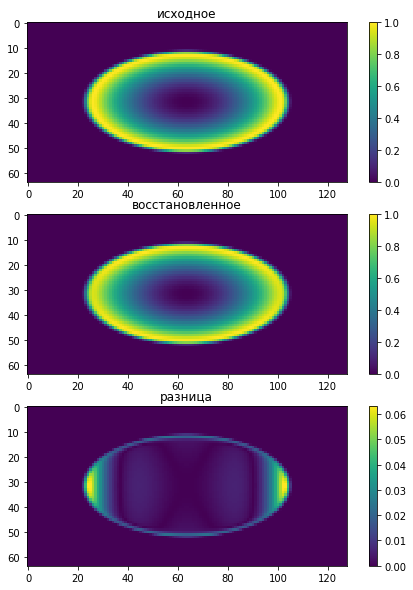

In [15]:
x, y = np.mgrid[-np.pi:np.pi:1j * 64, -np.pi:np.pi:1j * 128]
h1 = 2 * np.pi / 64
h2 = 2 * np.pi / 128
gauss = super_gauss(x, y, 2, 20)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y
g1 *= gauss
g2 *= gauss

front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h2, h2, 0.001, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(3, 1, figsize = (10,10))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front - front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Почему-то h1, h2 не работают как хотелось бы. Если указать h2, то считает лучше

# Итоги
1. На прямоугольных работает, но странно
2. Был баг с собственными значениями, но вроде исправлено
3. Нужно разобраться с методом получше. Почему h1, h2 так странно работают

4.732369495602858e-05


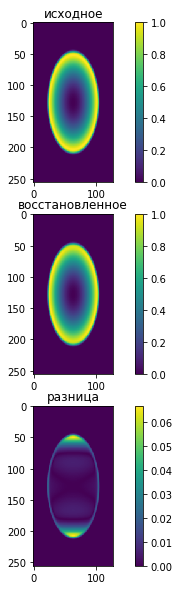

In [5]:
x, y = np.mgrid[-np.pi:np.pi:2 * np.pi / 256, -np.pi:np.pi:2 * np.pi / 128]
h1 = x[1,0] - x[0,0]
h2 = y[0,1] - y[0,0]
gauss = super_gauss(x, y, 2, 20)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y
g1 *= gauss
g2 *= gauss

front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h1, h1, 0.000000001, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(3, 1, figsize = (10,10))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front - front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

0.00018000042224256119


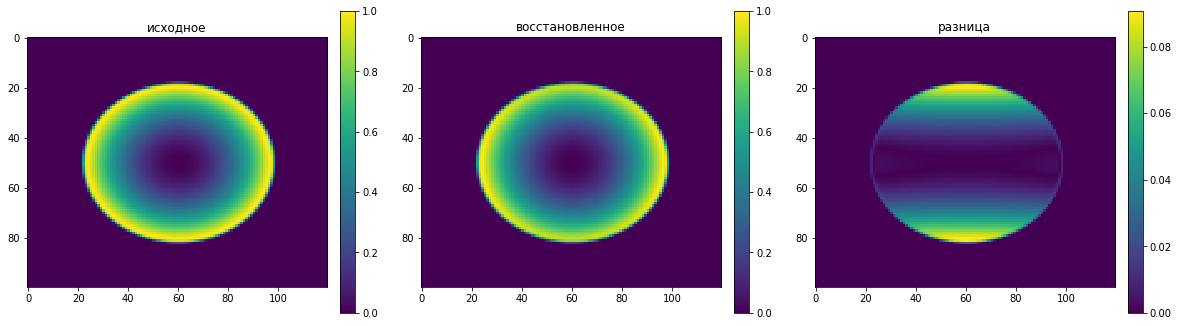

In [5]:
M = 7
h1 = 2 * np.pi / 100
h2 = 2 * np.pi / 120
x, y = np.mgrid[-np.pi:np.pi:h1, -np.pi:np.pi:h2]
h1 = x[1,0] - x[0,0]
h2 = y[0,1] - y[0,0]
gauss = super_gauss(x, y, 2, 40)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h1, h2, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

# Итоги
1. Если степени двойки то, h берется максимальным
2. Если не степень двойки то, h берутся такими же

Доказать бы это